In [25]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import sys
sys.path.append('..')

from libka import *

In [26]:
II = 0.018 # charge and discharge current

In [27]:
df_charge = pd.read_csv("in/CH18mA.txt", sep="\s+", skiprows=0, header=None, names=["t", "U"], usecols=[0, 1], decimal=",")
df_charge["Q"] = df_charge["t"] * II / 3600 * 1000 # mAh 
df_charge 

,t,U,Q
0,0.0,2.643127,0.000
1,20.0,2.749939,0.100
2,40.0,2.803345,0.200
3,60.0,2.845764,0.300
4,80.0,2.881775,0.400
...,...,...,...
1911,38220.0,4.198608,191.100
1912,38240.0,4.199219,191.200
1913,38260.0,4.199829,191.300
1914,38280.0,4.200134,191.400


In [28]:
# moj sposob
dU = []
dt = []

energy_charge = 0

for i in range(0, len(df_charge["U"])-1):
    dU.append((df_charge["U"][i+1]+df_charge["U"][i])/2)
    dt.append((df_charge["t"][i+1]-df_charge["t"][i]))


# print(len(dU))

for i in range(0, len(dU)):
    energy_charge += dU[i]*dt[i]*II
    # energy_discharge += dU[i]*0.36
    # energy_discharge += dch["U"][i]*0.36

energy_charge

2661.8602616622006

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


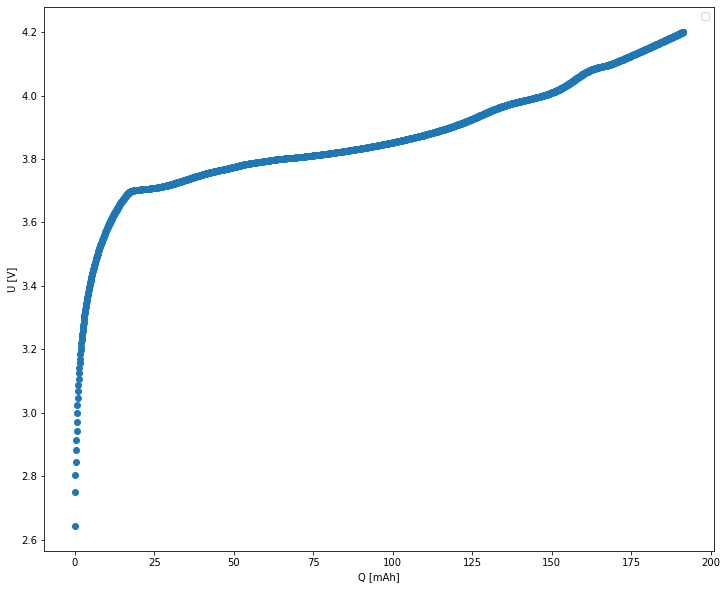

In [29]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(df_charge["Q"], df_charge["U"], 'o', label="")
ax.set_xlabel("Q [mAh]")
ax.set_ylabel("U [V]")
ax.legend()
plt.savefig("out/ch0.jpg")
plt.show()

In [30]:
df_discharge = pd.read_csv("in/DCH18mA.txt", sep="\s+", skiprows=0, header=None, names=["t", "U"], usecols=[0, 1], decimal=",")
df_discharge["Q"] = df_discharge["t"] * II / 3600 * 1000 # mAh 

In [31]:
# moj sposob
dU = []
dt = []

energy_discharge = 0

for i in range(0, len(df_discharge["U"])-1):
    dU.append((df_discharge["U"][i+1]+df_discharge["U"][i])/2)
    dt.append((df_discharge["t"][i+1]-df_discharge["t"][i]))


# print(len(dU))

for i in range(0, len(dU)):
    energy_discharge += dU[i]*dt[i]*II
    # energy_discharge += dU[i]*0.36
    # energy_discharge += dch["U"][i]*0.36

energy_discharge

2635.3473983820013

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


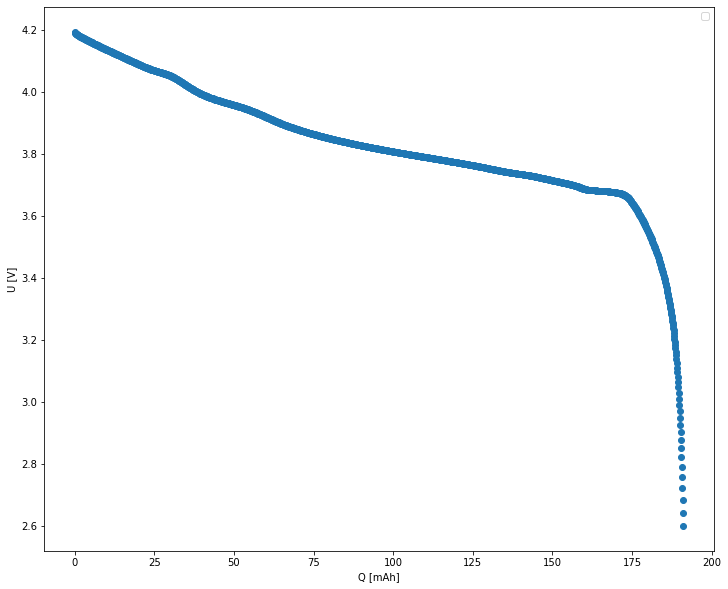

In [32]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(df_discharge["Q"], df_discharge["U"], 'o', label="")
ax.set_xlabel("Q [mAh]")
ax.set_ylabel("U [V]")
ax.legend()

plt.savefig("out/dch0.jpg")
plt.show()

In [33]:
# efficiency
eta = energy_discharge/energy_charge
eta


0.9900397238494993